# Group 27
# Student : Mirage Mohammad
# Student Number: 300080185

In [31]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [12]:
#Loading dataset
mydata = pd.read_csv('/Users/mirage/Desktop/Assignment/heart.csv')
mydata.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


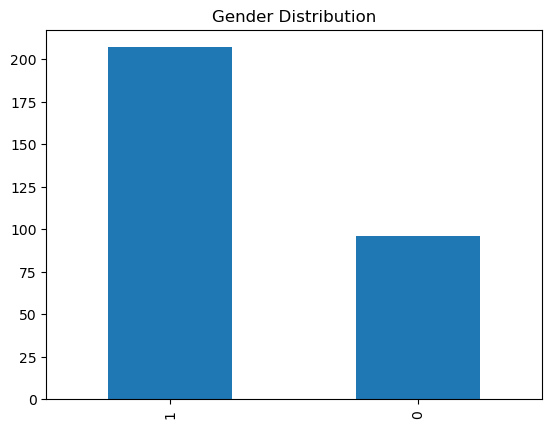

In [13]:
plt.figure() # Creates a new figure
mydata["sex"].value_counts().plot(kind="bar", title="Gender Distribution")
plt.show()

In [20]:
# Proving the input and output features
X = np.array(mydata[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']])
X.shape

(303, 14)

In [22]:
# Providing the output feature, y: regressand, dep. variable, response variable
y = np.array(mydata['output'])
y.shape

(303,)

In [24]:
#Splitting the dataset into train and test datasets
# Importing the train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30)
X_test.shape

(91, 14)

In [27]:
# Linear Regression class
model = LinearRegression()
#Fitting the model
mymodel = model.fit(X_train, y_train)

# 1. Understand the classification task for your dataset 
a. Is it a binary/multi-class classification? \
b. What is the goal? Is this for a particular application?

Answer:
a. This is a multi-class classification because one binary model needs to be trained for each class,
where this is a one vs all model; age, sex, cp, chol
b. The goal of this classification is to understand, predict, and analyze the heart attack data a long with linking their age, gender, cholestorol level

# 2. Analyze your dataset  
a. Characterize the dataset in terms of number of training examples, number of \
features, missing data, etc. 

# 3. Brainstorm about the attributes (Feature engineering) 
a. Think about the features that could be useful for this task, are they all present in the
dataset? Anything missing? Any attribute provided that doesn’t seem useful to you?

Answer: The weight data set can be very useful, unfortunately they are all question marks. Accurate age can be useful.
Useful Features: Weight column, acurate age column

# 4. Encode the features 
a. As you will use models that need discrete or continuous attributes, think about data
encoding and transformation.

In [84]:
label_age = LabelEncoder()
dataframe = pd.read_csv('/Users/mirage/Desktop/Assignment/heart.csv')


In [85]:
dataframe['age'] = label_age.fit_transform(dataframe['age'])

In [86]:
dataframe['age'].value_counts()

24    19
23    17
20    16
25    14
18    13
17    12
28    11
26    11
10    11
22    11
30    10
7     10
29     9
33     9
31     8
9      8
11     8
21     8
8      8
27     8
19     8
12     7
14     7
32     7
16     7
15     5
13     5
36     4
5      4
2      4
34     4
4      3
37     3
6      3
35     3
1      2
3      2
0      1
38     1
39     1
40     1
Name: age, dtype: int64

/Users/mirage/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

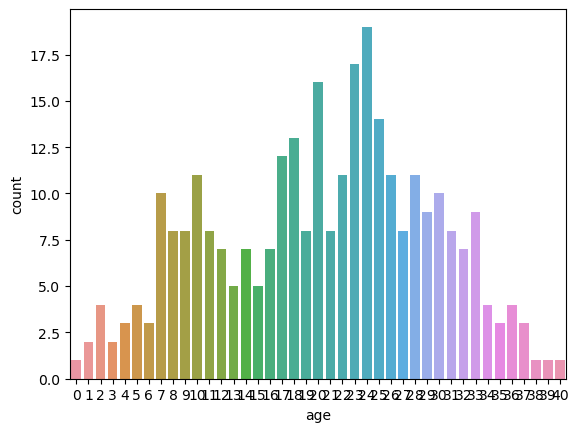

In [87]:
sns.countplot(dataframe['age'])

# 5. Prepare your data for the experiment, using cross-validation

In [29]:
#K-fold CV
cross-val_score function
scores = cross_val_score(mymodel, X_train, y_train, scoring = 'r2', cv = 10)


In [30]:
# Printing the average score
print(np.mean(scores))

1.0


In [32]:
# Printing the scores on the test dataset
#First: Prediction
#Importing cross_val_predict function
#The predictions
pred = cross_val_predict(model,X_test,y_test)
pred

array([ 1.82775941e-15, -9.38911013e-15,  1.00000000e+00,  1.00000000e+00,
        6.79405886e-15, -3.61997396e-15, -7.48855386e-15,  6.08347255e-16,
       -5.13260817e-15, -4.38802055e-15, -6.25524728e-15, -2.65023988e-15,
        1.00000000e+00,  1.55128260e-16,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  5.27727105e-15, -8.84357502e-15,  1.00000000e+00,
       -1.99547633e-15,  1.00000000e+00,  2.76203400e-15,  5.59746638e-15,
        1.00000000e+00,  2.04486421e-15,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  3.16990625e-15,
        7.51818545e-15,  9.31472294e-15,  4.83509818e-15, -3.89232123e-16,
        1.00000000e+00,  1.00000000e+00, -2.63976775e-16, -3.99630521e-15,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.16178147e-17,
       -2.53712183e-15,  2.31845615e-15,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  4.06446296e-15,  1.00000000e+00,
        1.66559675e-15, -

In [34]:
#CV on test data
scores_test = cross_val_score(model, X_test, y_test, cv = 10)
scores_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
# The average score
print(np.mean(scores_test))

1.0


**6. Train at least these 3 models using some default parameters. You should use ALL the models** \
below: \
a. Naïve Bayes \
b. Logistic Regression \
c. Multi-Layer Perceptron 

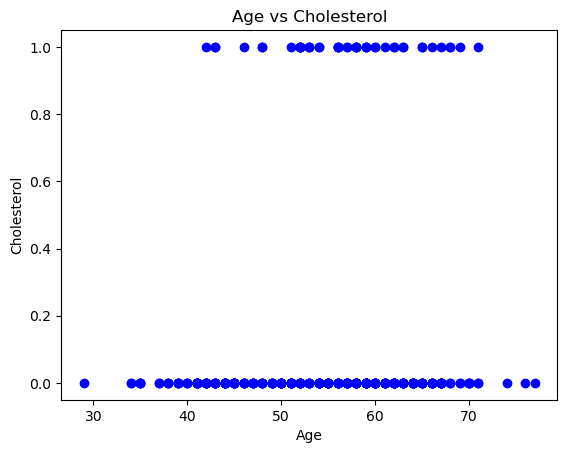

In [48]:
# b. Logistic Regression \
# Importing the dataset
dataset = pd.read_csv('/Users/mirage/Desktop/Assignment/heart.csv')

#get a copy of dataset exclude last column
Input = dataset.iloc[:, :1].values 

#get array of dataset in column 2st
output = dataset.iloc[:, 5].values 

# visualization part 
viz_train = plt

# applying scttered graph
viz_train.scatter(Input, output, color='blue')
viz_train.title('Age vs Cholesterol')

# X label and Y label
viz_train.xlabel('Age')
viz_train.ylabel('Cholesterol')

# showing the graph
viz_train.show()

# b. Logistic Regression

In [58]:
# Train the model with the training set by calling the .fit() function
# X_train contains the features used to train the model
# y_train contains the class labels for the samples from X_train
clf_lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1).fit(X_train, y_train)

In [59]:
print("Comparing the first ten actual values to the predicted values:")
# Print the first ten class labels for the training set
print(y_train[0:10])
# Predict whether the passengers did or did not survive the Titanic on the training set
lr_train_predictions = clf_lr.predict(X_train)
# Print the first ten predictions
print(lr_train_predictions[0:10])
print("Calculating the total accuracy for the training set:")
print(accuracy(y_train, lr_train_predictions))

Comparing the first ten actual values to the predicted values:
[0 1 1 1 0 0 1 0 0 1]
[0 1 1 1 0 0 1 0 0 1]
Calculating the total accuracy for the training set:
1.0


# c. Multi-Layer Perceptron 

In [49]:
# Train the model with the training set by calling the .fit() function
# X_train contains the features used to train the model
# y_train contains the class labels for the samples from X_train
clf_nb = MultinomialNB().fit(X_train, y_train)

In [53]:
def accuracy(actualTags, predictions):
    '''
    Calculates the average number of correct predictions.
        - actualTags: The ground truth
        - predictions: What the model predicts
    '''
    totalFound = 0
    for i in range(len(actualTags)):
        if (actualTags[i] == predictions[i]):
            totalFound += 1
    return totalFound / len(predictions)

In [54]:
print("Comparing the first ten actual values to the predicted values:")
# Print the first ten class labels for the training set
print(y_train[0:10])
nb_train_predictions = clf_nb.predict(X_train)
# Print the first ten predictions
print(nb_train_predictions[0:10])
print("Calculating the total accuracy for the training set:")
print(accuracy(y_train, nb_train_predictions))

Comparing the first ten actual values to the predicted values:
[0 1 1 1 0 0 1 0 0 1]
[1 1 1 1 0 0 1 0 1 0]
Calculating the total accuracy for the training set:
0.8726415094339622


# 7. Test your 3 models using cross-validation (provided the split in step 5)

# 8. Perform an evaluation with precision/recall measures

In [62]:
def precision(actualTags, predictions, classOfInterest):
    '''
    Calculates the precision for a specific class, given the ground truth and predicted values.
    '''
    totalFound = 0
    for i in range(len(actualTags)):
        if (actualTags[i] == classOfInterest and actualTags[i] == predictions[i]):
            totalFound += 1
    return totalFound / np.count_nonzero(predictions == classOfInterest)

In [63]:
def recall(actualTags, predictions, classOfInterest):
    '''
    Calculates the recall for a specific class, given the ground truth and predicted values.
    '''
    totalFound = 0
    for i in range(len(actualTags)):
        if (actualTags[i] == classOfInterest and actualTags[i] == predictions[i]):
            totalFound += 1
    return totalFound / np.count_nonzero(actualTags == classOfInterest)

In [64]:
# Example of calculating accuracy
accuracy([0, 1, 1, 1, 0], [1, 1, 1, 0, 1])

0.4

In [66]:
# split the large dataset into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=2)
# Look at the shape of the outputs
print(X_train.shape)
print(y_val.shape)

(242, 14)
(61,)


In [69]:
# Get the predictions for the validation set
nb_val_predictions = clf_nb.predict(X_val)
# Retrieve and print the precision values for class 1 and class 0
print("Precision when class = 0: " + str(precision(y_val, nb_val_predictions, 0)))
print("Precision when class = 1: " + str(precision(y_val, nb_val_predictions, 1)))
# Retrieve and print the recall values for class 1 and class 0
print("Recall when class = 0: " + str(recall(y_val, nb_val_predictions, 0)))
print("Recall when class = 1: " + str(recall(y_val, nb_val_predictions, 1)))
# Retrieve and print the accuracy for the model
print("Accuracy: " + str(accuracy(y_val, nb_val_predictions)))

Precision when class = 0: 1.0
Precision when class = 1: 0.8285714285714286
Recall when class = 0: 0.8125
Recall when class = 1: 1.0
Accuracy: 0.9016393442622951


# 9. For each type of model, modify some parameters, and perform a train/test/evaluate again.
Do this for two times.

# 10. Analyze the obtained results \
a. Compare quantitatively (with the precision/recall measures) your 9 results. The 9
results come from 3 models, each with default parameters from step 6 + 2 variations
from step 9. \
b. Show some examples of results that are good and not good (false positives and false
negatives), try to understand why and discuss.

In [88]:
def countPos(text):
    count = 0
    for t in text.split():
        if t in posWords:
            count += 1
    return count

def countNeg(text):
    count = 0
    for t in text.split():
        if t in negWords:
            count += 1
    return count

In [89]:
df = pd.read_csv('/Users/mirage/Desktop/Assignment/heart.csv', encoding="ISO-8859-1")


In [90]:
df.tail(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


# Resources Used
https://www.youtube.com/watch?v=etkxDx4gesk&ab_channel=GeospatialTechnology%26DataScience \
https://www.youtube.com/watch?v=r-uOLxNrNk8&ab_channel=freeCodeCamp.org \
https://www.youtube.com/watch?v=HW29067qVWk&ab_channel=CoreySchafer \
https://scikit-learn.org/stable/modules/cross_validation.html
